In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [32]:
#Tensorflow tutorial
#Tensorflow executes code under a Tensorflow session


sess = tf.Session()
print(sess.run(tf.constant("Hi I am here")))




b'Hi I am here'


In [33]:
#Tensorflow is very close to the numpy api. Tensorflow converts everything to tensors which are multidimensional
#arrays. Tensors refer to the subscipt below the variable indicating multiple dimensions. Tensors are a notation for
#matrices. 


a = tf.constant(10)
b = tf.constant(20)
result_add = sess.run(tf.add(a,b))
result_multiply = sess.run(tf.multiply(a,b))
result_divide = sess.run(tf.divide(a,b))
print(result_add,result_multiply,result_divide)




30 200 0.5


In [ ]:
#Tensorflow was designed as a graph. 









In [30]:
def trans_for_one(labels):
    return np.array(labels).reshape(len(labels),-1)

def analyze_classifier(sess,i,w1,b1,w2,b2,XOR_X,XOR_Y):
    print('Epoch:%i'%i)
    print('Hypo:'% sess.run(hypothesis,feed_dict={input_:XOR_X, target:XOR_T}))
    print('w1:%s' % sess.run(w1))
    print('b1:%s' % sess.run(w1))
    print('w2:%s' % sess.run(w2))
    print('b2:%s' % sess.run(b2))
    print('cost (ce):%s' % sess.run(cross_entropy, feed_dict={input_:XOR_X, target:XOR_T}))
    #visualize classification boundary
    xs = np.linspace(-5,5)
    ys = np.linspace(-5,5)
    
    pred_classes = []
    for x in xs:
        for y in ys:
            pred_class = sess.run(hypothesis,feed_dict={input_:[[x,y]]})
            pred_classes.append((x,y,pred_class.argmax()))
        xs_p, ys_p = [],[]
        xs_n, ys_n = [],[] #negative and positive WRT classification boundary
        for x,y,c in pred_classes:
            if c==0:
                xs_n.append(x)
                ys_n.append(y)
            else:
                xs_p.append(x)
                ys_p.append(y)
        plt.plot(xs_p,ys_p,'ro',xs_n,xs_p,'bo')
        plt.show()
        

XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [0,1,1,0]


enc = OneHotEncoder() #where is this from, there should be a tf.onehotencoder
enc.fit(trans_for_one(XOR_Y))
XOR_T = enc.transform(trans_for_one(XOR_Y)).toarray()

nb_classes=2
input_ = tf.placeholder(tf.float32,shape=[None,len(XOR_X[0])],name="input")
target = tf.placeholder(tf.float32, shape=[None,nb_classes],name="output")

nb_hidden_nodes = 2



w1 = tf.Variable(tf.random_uniform([2,nb_hidden_nodes],-1,1,seed=0),name="Weights1")
w2 = tf.Variable(tf.random_uniform([nb_hidden_nodes,nb_classes],-1,1,seed=0),name="Weights2")
                 
b1 = tf.Variable(tf.zeros([nb_hidden_nodes]),name="Biases1")
b2 = tf.Variable(tf.zeros([nb_classes]),name="Biases2")

                 
activation2 = tf.sigmoid(tf.matmul(input_,w1)+b1)
hypothesis = tf.nn.softmax(tf.matmul(activation2,w2)+b2)
cross_entropy = -tf.reduce_sum(target*tf.log(hypothesis))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) 
    for i in range(20000):
        sess.run(train_step,feed_dict={input_:XOR_X,target:XOR_T})
        if(i%10000==0):
            analyze_classifier(sess,i,w1,b1,w2,b2,XOR_X,XOR_T)







Epoch:0
Hypo:
w1:[[-0.79593647  0.93947881]
 [ 0.68854761 -0.89423609]]
b1:[[-0.79593647  0.93947881]
 [ 0.68854761 -0.89423609]]
w2:[[-0.79084051  0.93289936]
 [ 0.69278169 -0.8986907 ]]
b2:[ 0.00394399 -0.00394398]
cost (ce):2.87031


ValueError: x and y must have same first dimension, but have shapes (0,) and (50,)

Instructions for updating:
Use `tf.global_variables_initializer` instead.

Epoch 0
Hypothesis [[ 0.48712057  0.51287943]
 [ 0.3380821   0.66191792]
 [ 0.65063184  0.34936813]
 [ 0.5031724   0.49682763]]
w1=[[-0.79593647  0.93947881]
 [ 0.68854761 -0.89423609]]
b1=[-0.00733338  0.00893857]
w2=[[-0.79084051  0.93289936]
 [ 0.69278169 -0.8986907 ]]
b2=[ 0.00394399 -0.00394398]
cost (ce)=2.87031


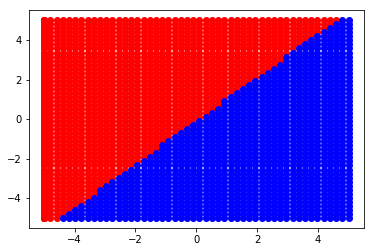


Epoch 10000
Hypothesis [[ 0.99773693  0.00226305]
 [ 0.00290443  0.99709558]
 [ 0.00295531  0.99704474]
 [ 0.99804318  0.00195681]]
w1=[[-6.62694883  7.52302551]
 [ 6.91208267 -7.39292049]]
b1=[ 3.32245088  3.76204109]
w2=[[ 6.63464451 -6.49259472]
 [ 6.40471601 -6.61061907]]
b2=[-9.65064335  9.65065002]
cost (ce)=0.0100926


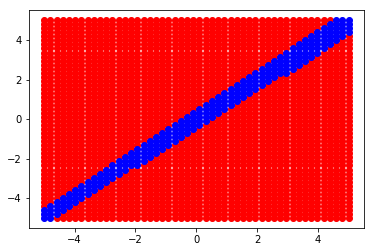


Epoch 20000
Hypothesis [[  9.98954773e-01   1.04520307e-03]
 [  1.35455513e-03   9.98645484e-01]
 [  1.37042650e-03   9.98629570e-01]
 [  9.99092221e-01   9.07784502e-04]]
w1=[[-7.04857349  7.84673071]
 [ 7.33061361 -7.6883769 ]]
b1=[ 3.53246331  3.89587522]
w2=[[ 7.35947943 -7.21742964]
 [ 7.14059544 -7.34649324]]
b2=[-10.74944305  10.7494421 ]
cost (ce)=0.00468077


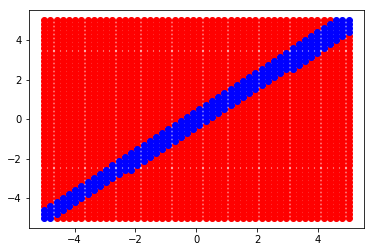

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder


def trans_for_ohe(labels):
    """Transform a flat list of labels to what one hot encoder needs."""
    return np.array(labels).reshape(len(labels), -1)


def analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T):
    """Visualize the classification."""
    print('\nEpoch %i' % i)
    print('Hypothesis %s' % sess.run(hypothesis,
                                     feed_dict={input_: XOR_X,
                                                target: XOR_T}))
    print('w1=%s' % sess.run(w1))
    print('b1=%s' % sess.run(b1))
    print('w2=%s' % sess.run(w2))
    print('b2=%s' % sess.run(b2))
    print('cost (ce)=%s' % sess.run(cross_entropy,
                                    feed_dict={input_: XOR_X,
                                               target: XOR_T}))
    # Visualize classification boundary
    xs = np.linspace(-5, 5)
    ys = np.linspace(-5, 5)
    pred_classes = []
    for x in xs:
        for y in ys:
            pred_class = sess.run(hypothesis,
                                  feed_dict={input_: [[x, y]]})
            pred_classes.append((x, y, pred_class.argmax()))
    xs_p, ys_p = [], []
    xs_n, ys_n = [], []
    for x, y, c in pred_classes:
        if c == 0:
            xs_n.append(x)
            ys_n.append(y)
        else:
            xs_p.append(x)
            ys_p.append(y)
    plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo')
    plt.show()


# The training data
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Features
XOR_Y = [0, 1, 1, 0]  # Class labels
assert len(XOR_X) == len(XOR_Y)  # sanity check

# Transform labels to targets
enc = OneHotEncoder()
enc.fit(trans_for_ohe(XOR_Y))
XOR_T = enc.transform(trans_for_ohe(XOR_Y)).toarray()

# The network
nb_classes = 2
input_ = tf.placeholder(tf.float32,
                        shape=[None, len(XOR_X[0])],
                        name="input")
target = tf.placeholder(tf.float32,
                        shape=[None, nb_classes],
                        name="output")
nb_hidden_nodes = 2
# enc = tf.one_hot([0, 1], 2)
w1 = tf.Variable(tf.random_uniform([2, nb_hidden_nodes], -1, 1, seed=0),
                 name="Weights1")
w2 = tf.Variable(tf.random_uniform([nb_hidden_nodes, nb_classes], -1, 1,
                                   seed=0),
                 name="Weights2")
b1 = tf.Variable(tf.zeros([nb_hidden_nodes]), name="Biases1")
b2 = tf.Variable(tf.zeros([nb_classes]), name="Biases2")
activation2 = tf.sigmoid(tf.matmul(input_, w1) + b1)
hypothesis = tf.nn.softmax(tf.matmul(activation2, w2) + b2)
cross_entropy = -tf.reduce_sum(target * tf.log(hypothesis))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Start training
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)

    for i in range(20001):
        sess.run(train_step, feed_dict={input_: XOR_X, target: XOR_T})

        if i % 10000 == 0:
            analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T)

In [11]:
x = tf.placeholder(tf.float32, shape=[4,2], name='x')
y = tf.placeholder(tf.float32, shape=[4,1], name='y')


#setup weights and bias z = w*x+b
w0 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="w0")
w1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="w1")

bias_0 = tf.Variable(tf.zeros([2]), name="bias_0")
bias_1 = tf.Variable(tf.zeros([2]), name="bias_1")

z = tf.sigmoid(tf.matmul(x,w0)+bias_0)
hypothesis = tf.sigmoid(tf.matmul(z,w1)+bias_1)


cost = tf.reduce_mean((y*tf.log(hypothesis))+(1-y)*tf.log(1. - hypothesis)*-1.)
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:

for i in range(100000):
    sess.run(train, feed_dict={x: XOR_X, y: XOR_Y})
    if i % 1000 == 0:
        print('Epoch ', i)
        print('Hypothesis ', sess.run(hypothesis, feed_dict={x: XOR_X, y: XOR_Y}))
        print('Theta1 ', sess.run(w0))
        print('Bias1 ', sess.run(bias_0))
        print('Theta2 ', sess.run(w1))
        print('Bias2 ', sess.run(bias_1))
        print('cost ', sess.run(cost, feed_dict={x: XOR_X, y: XOR_Y}))    

Epoch  0
Hypothesis  [[ 0.555323    0.44973719]
 [ 0.58989638  0.44296476]
 [ 0.59176016  0.4688521 ]
 [ 0.6246109   0.46289268]]
Theta1  [[-0.95617688  0.20052759]
 [ 0.23060793  0.76648295]]
Bias1  [ 0.00093509 -0.0010025 ]
Theta2  [[-0.46373156 -0.35478356]
 [ 0.91880393 -0.03853079]]
Bias2  [-0.00499562 -0.00500202]
cost  0.0481151
Epoch  1000
Hypothesis  [[ 0.01337254  0.00831926]
 [ 0.00960042  0.00501446]
 [ 0.01437561  0.00815793]
 [ 0.01007846  0.00495299]]
Theta1  [[-0.34479943  0.38638481]
 [ 0.72448629  0.92102855]]
Bias1  [ 1.10510647  0.3428013 ]
Theta2  [[-1.88715601 -1.78145075]
 [-0.65029722 -1.6052649 ]]
Bias2  [-2.50308824 -2.50370193]
cost  -2.36943
Epoch  2000
Hypothesis  [[  1.62122233e-05   8.17689761e-06]
 [  8.81776032e-06   3.94791550e-06]
 [  1.04886931e-05   4.77578487e-06]
 [  7.68110749e-06   3.33546177e-06]]
Theta1  [[ 0.45592567  1.05010498]
 [ 1.13563025  1.40735805]]
Bias1  [ 2.31787252  1.49381948]
Theta2  [[-4.11799812 -4.01232767]
 [-2.78916597 -3.7